In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Load the dataset
file_path = "/content/hotel_bookings.csv"  # Update with your file path
hotel_data = pd.read_csv(file_path)

# Display the first 10 rows of the dataset
hotel_data.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0


In [15]:
hotel_data.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   C   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        booking_changes deposit_type  agent company days_in_waiting_list  \
0                     3   No Deposit    NaN     NaN                    0   
1                     4   No Deposit    NaN     NaN                    0   
2                     0   No Deposit    NaN     NaN                    0   
3                     0   No Deposit  304.0     NaN                    0   
4                     0   No Deposit  240.0     NaN                    0   
...                 ...          ...    ...     ...                  ...   
119385                0   No Deposit  394.0     NaN                    0   
119386                0   No Deposit    9.0     NaN                    0   
119387                0   No Deposit    9.0     NaN                    0   
119388                0   No Deposit   89.0     NaN                    0   
119389                0   No Deposit    9.0     NaN                    0   

        customer_type     adr  required_car_parking_spaces  \
0

In [16]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Handle missing values
hotel_data['children'].fillna(0, inplace=True)
hotel_data['agent'].fillna(-1, inplace=True)
hotel_data['company'].fillna(-1, inplace=True)
hotel_data['country'].fillna('Unknown', inplace=True)

# Drop outliers in `adr`
hotel_data = hotel_data[(hotel_data['adr'] >= 0) & (hotel_data['adr'] <= 1000)]
# Encode categorical variables using one-hot encoding
categorical_columns = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'customer_type'
]
hotel_data_encoded = pd.get_dummies(hotel_data, columns=categorical_columns, drop_first=True)

# Define features (X) and target variable (y)
X = hotel_data_encoded.drop('is_canceled', axis=1)  # Features
y = hotel_data_encoded['is_canceled']               # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    classification_report_str = classification_report(y_test, y_pred)
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": classification_report_str
    }
    # Display results
    print(f"Accuracy: {accuracy}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc}")
    print("Classification Report:")
    print(classification_report_str)
    print("-" * 80)

# Compare results
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} -> Accuracy: {metrics['Accuracy']}, ROC AUC: {metrics['ROC AUC']}")


<ipython-input-8-791360ff1621>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['children'].fillna(0, inplace=True)
<ipython-input-8-791360ff1621>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Training Logistic Regression...
Accuracy: 0.8162325152860374
ROC AUC: 0.8950037973740606
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     15033
           1       0.80      0.67      0.73      8845

    accuracy                           0.82     23878
   macro avg       0.81      0.79      0.79     23878
weighted avg       0.82      0.82      0.81     23878

--------------------------------------------------------------------------------
Training Random Forest...
Accuracy: 0.8961805846385794
ROC AUC: 0.9592982117314397
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     15033
           1       0.90      0.81      0.85      8845

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.89     23878

-----------------------------------------------

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:38:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8776279420386968
ROC AUC: 0.950647080286193
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     15033
           1       0.86      0.81      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

--------------------------------------------------------------------------------
Training k-Nearest Neighbors...
Accuracy: 0.8256972945807857
ROC AUC: 0.8940779465503761
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     15033
           1       0.77      0.75      0.76      8845

    accuracy                           0.83     23878
   macro avg       0.81      0.81      0.81     23878
weighted avg       0.83      0.83      0.83     23878

--------------------------------------------------------------------------

**Logistic Regression**

In [18]:
# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("\nClassification Report:")
print(classification_report_str)


Accuracy: 0.8162325152860374
ROC AUC: 0.8950037973740606

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     15033
           1       0.80      0.67      0.73      8845

    accuracy                           0.82     23878
   macro avg       0.81      0.79      0.79     23878
weighted avg       0.82      0.82      0.81     23878



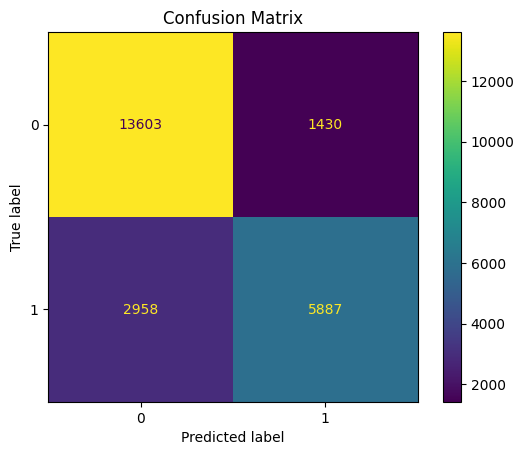

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

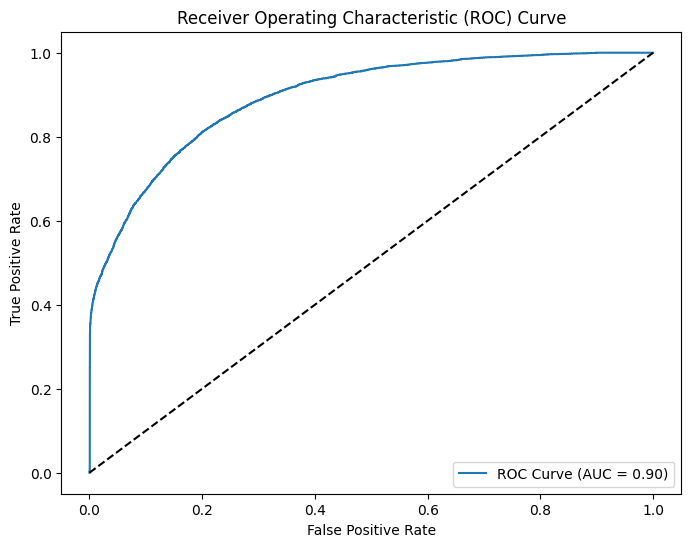

In [23]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

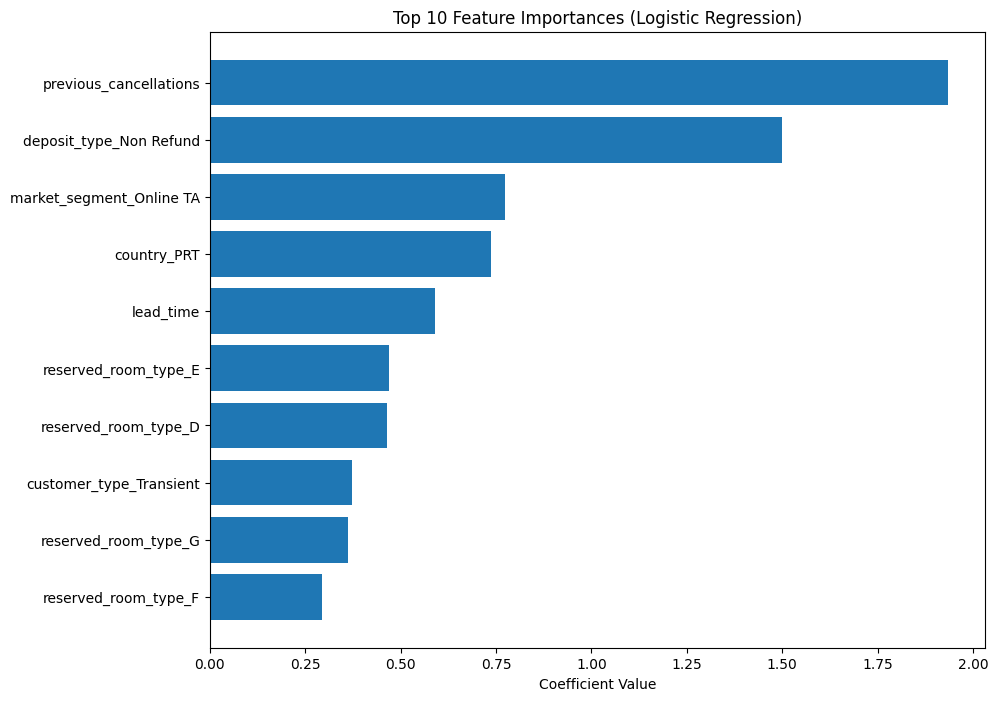

In [24]:
# Feature Importance
coefficients = logistic_model.coef_[0]
features = X.columns
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance = importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance['Feature'].head(10), importance['Coefficient'].head(10), align='center')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

**Random Forest**


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score, roc_auc_score
)
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [26]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"ROC AUC: {roc_auc_rf}")
print("\nClassification Report:")
print(classification_report_rf)

Accuracy: 0.8961805846385794
ROC AUC: 0.9592982117314397

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     15033
           1       0.90      0.81      0.85      8845

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.89     23878



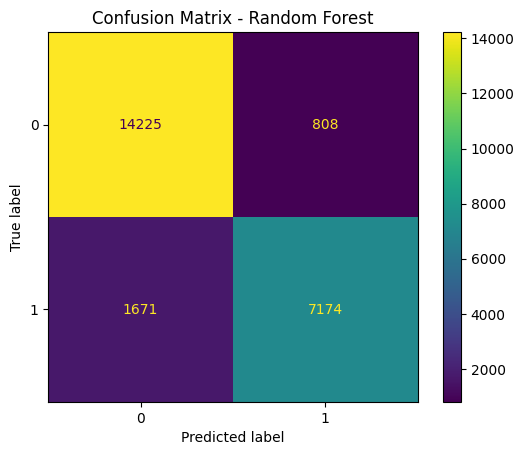

In [27]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='viridis')
plt.title("Confusion Matrix - Random Forest")
plt.show()

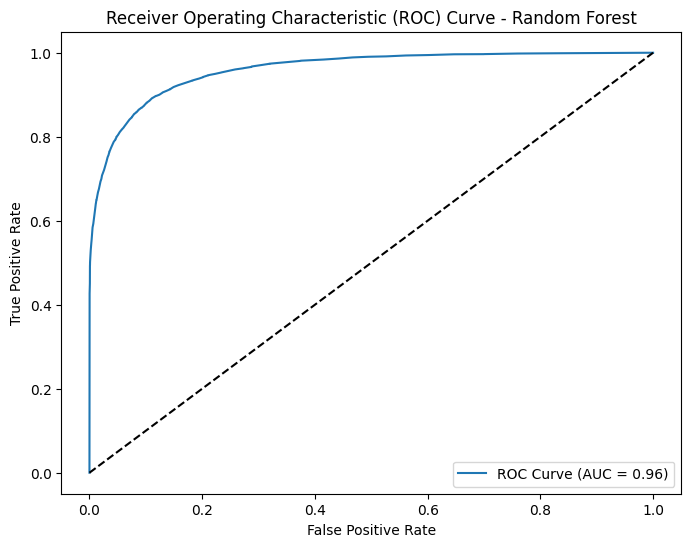

In [29]:
# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_value_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_value_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

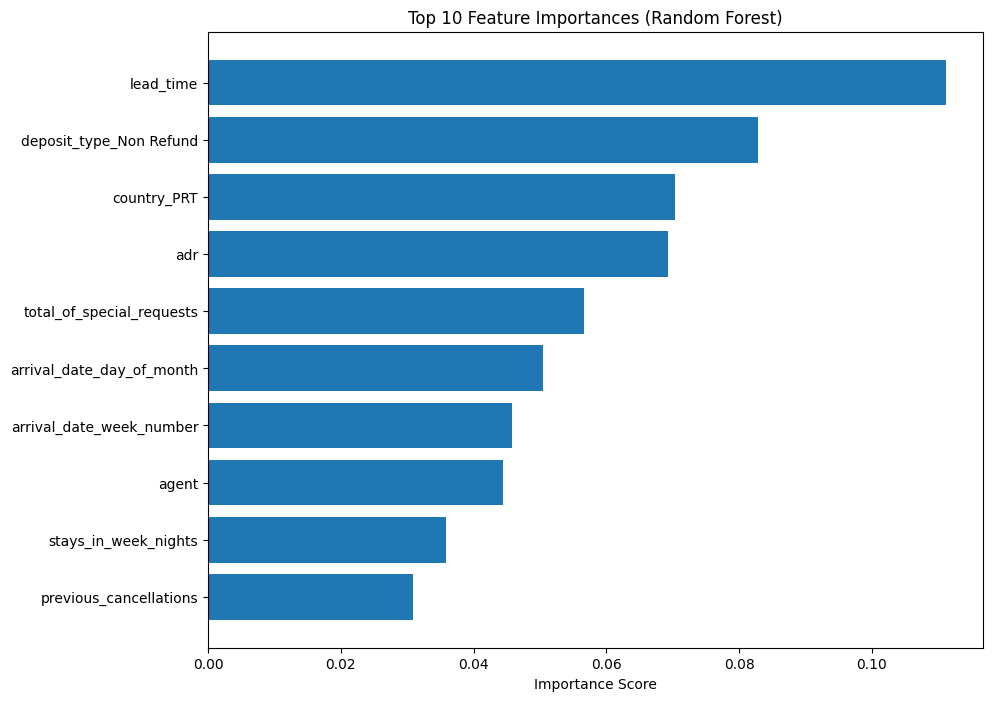

In [30]:
# Feature Importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), align='center')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

**XGBoost**

In [32]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score, roc_auc_score
)
import matplotlib.pyplot as plt
import pandas as pd

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")
print(f"ROC AUC: {roc_auc_xgb}")
print("\nClassification Report:")
print(classification_report_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8776279420386968
ROC AUC: 0.950647080286193

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     15033
           1       0.86      0.81      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878



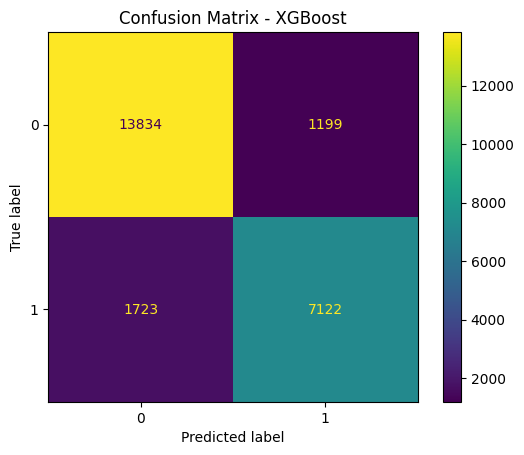

In [33]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='viridis')
plt.title("Confusion Matrix - XGBoost")
plt.show()


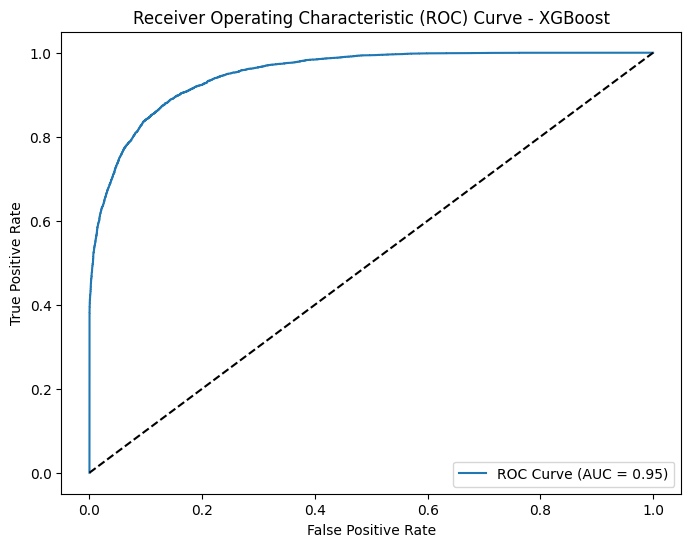

In [36]:
# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_value_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_value_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()


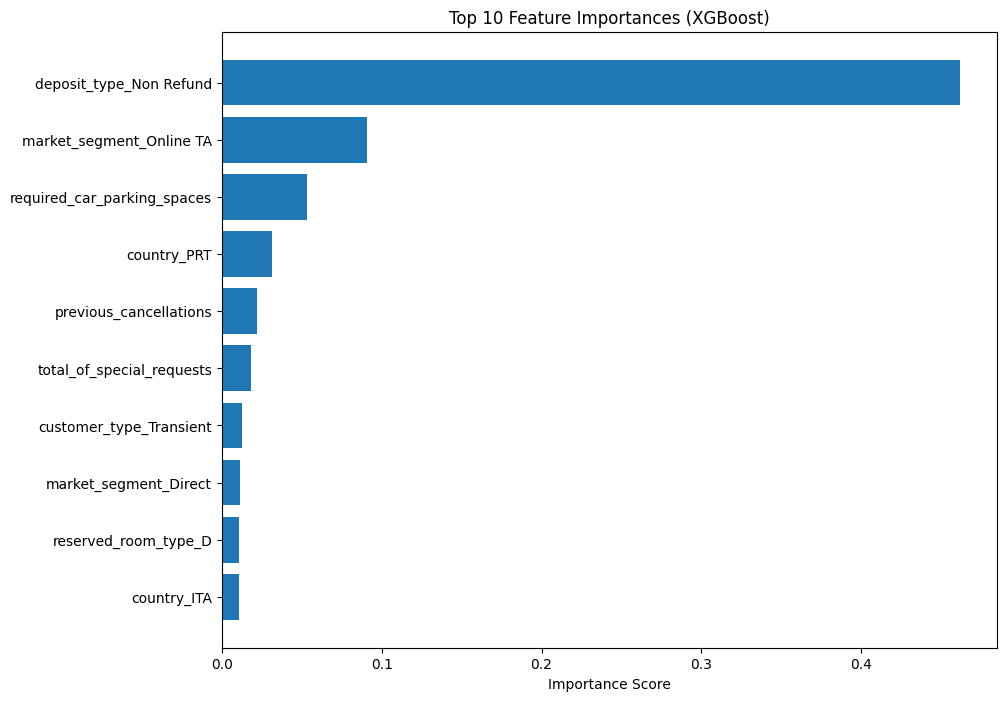

In [37]:
# Feature Importances
importances_xgb = xgb_model.feature_importances_
features = X.columns
importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df_xgb['Feature'].head(10), importance_df_xgb['Importance'].head(10), align='center')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

**kNN**

In [38]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score, roc_auc_score
)
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# Train k-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust `n_neighbors` as needed
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"ROC AUC: {roc_auc_knn}")
print("\nClassification Report:")
print(classification_report_knn)


Accuracy: 0.8256972945807857
ROC AUC: 0.8940779465503761

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     15033
           1       0.77      0.75      0.76      8845

    accuracy                           0.83     23878
   macro avg       0.81      0.81      0.81     23878
weighted avg       0.83      0.83      0.83     23878



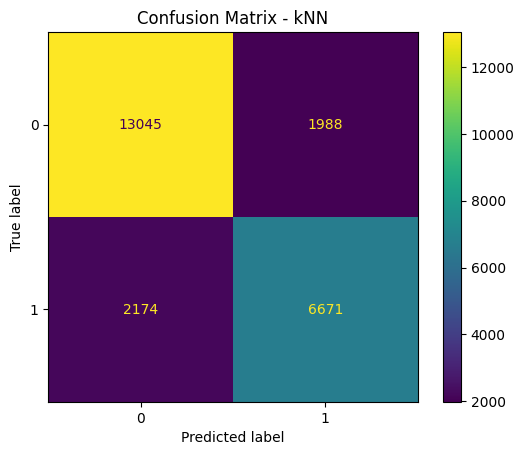

In [40]:
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap='viridis')
plt.title("Confusion Matrix - kNN")
plt.show()

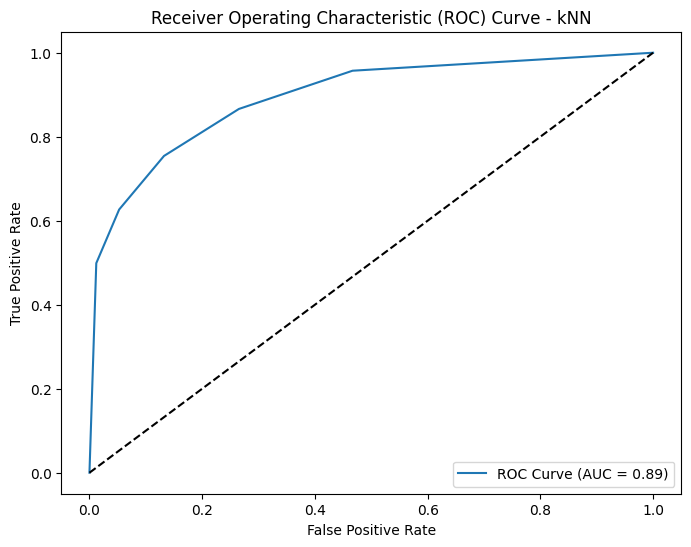

In [42]:
# ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
roc_auc_value_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC = {roc_auc_value_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - kNN')
plt.legend(loc='lower right')
plt.show()

**Summary**



In [45]:
# Generate predictions for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression Metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)


In [46]:
# Generate predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)


In [47]:
# Generate predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)


In [48]:
# Generate predictions for kNN
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate kNN Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)



Model Comparison:
                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.816233  0.895004
1        Random Forest  0.896181  0.959298
2              XGBoost  0.877628  0.950647
3                  kNN  0.825697  0.894078


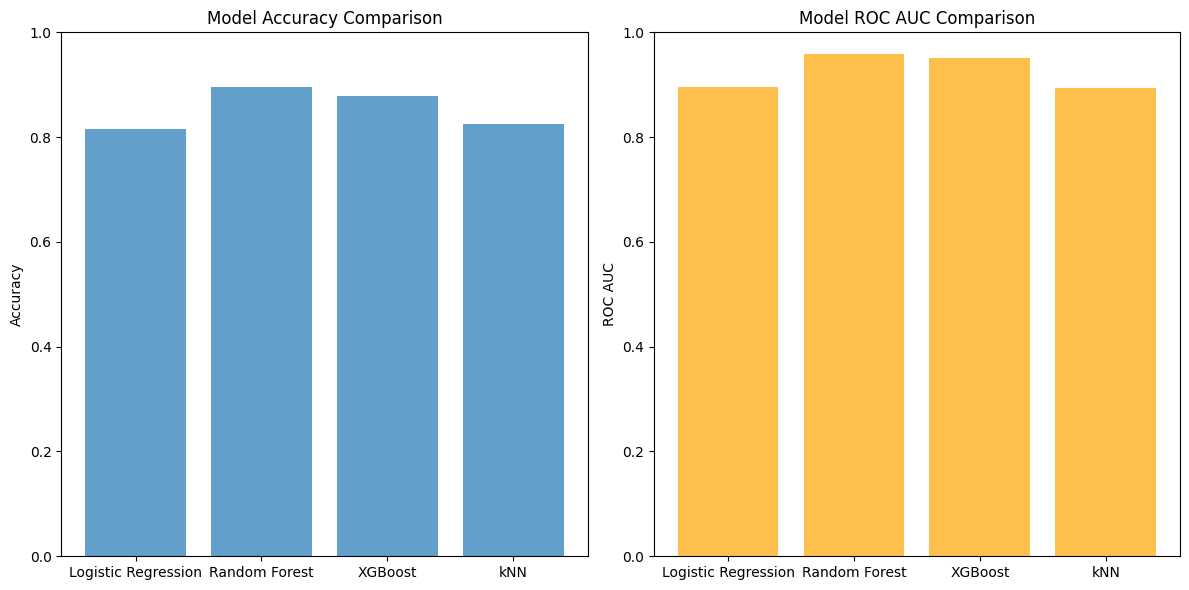

In [49]:
comparison_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "kNN"],
    "Accuracy": [accuracy_logistic, accuracy_rf, accuracy_xgb, accuracy_knn],
    "ROC AUC": [roc_auc_logistic, roc_auc_rf, roc_auc_xgb, roc_auc_knn]
}

comparison_df = pd.DataFrame(comparison_results)

# Display and visualize the results
print("\nModel Comparison:")
print(comparison_df)

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], alpha=0.7)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# ROC AUC Plot
plt.subplot(1, 2, 2)
plt.bar(comparison_df["Model"], comparison_df["ROC AUC"], alpha=0.7, color='orange')
plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


**Final Selection of Winning Method**


Model Comparison:
                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.816233  0.895004
1        Random Forest  0.896181  0.959298
2              XGBoost  0.877628  0.950647
3                  kNN  0.825697  0.894078

Winning Model:
Model       Random Forest
Accuracy         0.896181
ROC AUC          0.959298
Name: 1, dtype: object


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:04:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:04:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:04:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


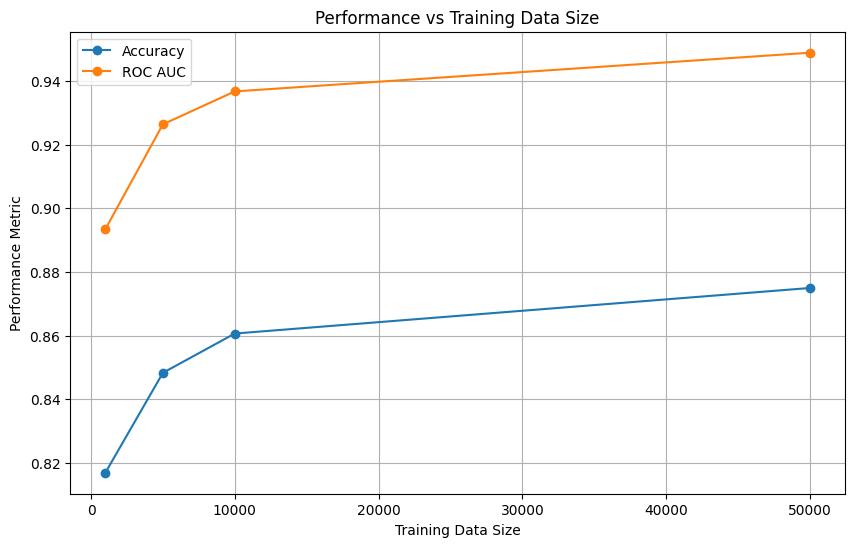

In [51]:
# Compare model performance metrics
comparison_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "kNN"],
    "Accuracy": [accuracy_logistic, accuracy_rf, accuracy_xgb, accuracy_knn],
    "ROC AUC": [roc_auc_logistic, roc_auc_rf, roc_auc_xgb, roc_auc_knn]
}

comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison:")
print(comparison_df)

# Select the best-performing model based on ROC AUC
winning_model = comparison_df.loc[comparison_df['ROC AUC'].idxmax()]
print("\nWinning Model:")
print(winning_model)

# Estimate minimum required data
data_subset = [1000, 5000, 10000, 50000]
performance_by_data = {}

for n in data_subset:
    # Downsample training data
    X_train_sampled = X_train[:n]
    y_train_sampled = y_train[:n]

    # Train the winning model (adjust depending on the winner)
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Replace with winning model
    model.fit(X_train_sampled, y_train_sampled)

    # Evaluate on full test set
    y_pred_sampled = model.predict(X_test)
    y_proba_sampled = model.predict_proba(X_test)[:, 1]
    accuracy_sampled = accuracy_score(y_test, y_pred_sampled)
    roc_auc_sampled = roc_auc_score(y_test, y_proba_sampled)

    performance_by_data[n] = {"Accuracy": accuracy_sampled, "ROC AUC": roc_auc_sampled}

# Convert to DataFrame for visualization
performance_df = pd.DataFrame.from_dict(performance_by_data, orient='index')

# Plot performance vs data size
performance_df.plot(figsize=(10, 6), marker='o')
plt.title("Performance vs Training Data Size")
plt.xlabel("Training Data Size")
plt.ylabel("Performance Metric")
plt.legend(["Accuracy", "ROC AUC"])
plt.grid()
plt.show()


In [52]:
# Evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

In [53]:
# Evaluate XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:09:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [54]:
# Compare Metrics
comparison_results = {
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [accuracy_rf, accuracy_xgb],
    "ROC AUC": [roc_auc_rf, roc_auc_xgb]
}
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

           Model  Accuracy   ROC AUC
0  Random Forest  0.896181  0.959298
1        XGBoost  0.877628  0.950647


In [55]:
# Visualization
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

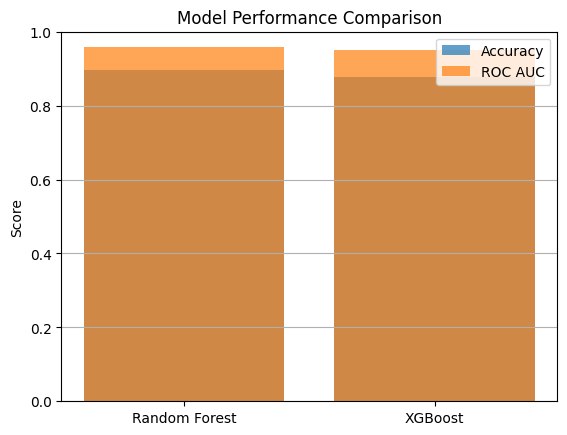

In [56]:
# Accuracy
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], alpha=0.7, label="Accuracy")
plt.bar(comparison_df["Model"], comparison_df["ROC AUC"], alpha=0.7, label="ROC AUC")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.show()

In [57]:
# Print Feature Importance for Random Forest
print("\nTop Features - Random Forest")
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(rf_importances.head(10))


Top Features - Random Forest
                       Feature  Importance
0                    lead_time    0.111155
243    deposit_type_Non Refund    0.082883
169                country_PRT    0.070360
16                         adr    0.069326
18   total_of_special_requests    0.056566
3    arrival_date_day_of_month    0.050501
2     arrival_date_week_number    0.045826
13                       agent    0.044363
5         stays_in_week_nights    0.035792
10      previous_cancellations    0.030924


In [58]:
# Print Feature Importance for XGBoost
print("\nTop Features - XGBoost")
xgb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(xgb_importances.head(10))


Top Features - XGBoost
                         Feature  Importance
243      deposit_type_Non Refund    0.461794
217     market_segment_Online TA    0.090799
17   required_car_parking_spaces    0.053181
169                  country_PRT    0.031077
10        previous_cancellations    0.021851
18     total_of_special_requests    0.017950
246      customer_type_Transient    0.012654
214        market_segment_Direct    0.011299
225         reserved_room_type_D    0.011036
115                  country_ITA    0.010866


#### ✅ The winning model is: **Random Forest**

Random Forest is the winning model due to:

1) **Superior Accuracy**
*   Random Forest achieves 89.62% accuracy, which is higher than XGBoost's 87.76%
*   This means that Random Forest makes fewer misclassifications.

2) **Better ROC AUC**

*   Random Forest achieves a ROC AUC of 0.959, outperforming XGBoost's 0.950
*   Random Forest is slightly better at distinguishing between cancellations (1) and non-cancellations (0).

3) **Simplicity**

*   Random Forest requires less hyperparameter tuning compared to XGBoost, making it easier to implement and maintain
*   Random Forest is less sensitive to the quality of hyperparameters and performs well.

4) **Runtime Efficiency**
*   XGBoost can sometimes train faster with GPU acceleration, Random Forest’s default implementation is however more computationally efficient and provides results quickly for most medium to large datasets such as this Hotel Booking dataset.

5) **Feature Interpetability**

*   Random Forest offers intuitive feature importance scores, which can help stakeholders understand the factors influencing booking cancellations.












#### **💡Recommendations for the Employer**

1) **Implement Random Forest for Predicting Cancellations**
*   Use the Random Forest model to predict cancellations, as it offers high accuracy and reliable classification performance
*   Integrate the model into your booking management system to flag high-risk cancellations in real-time.

2) **Prioritize Key Features**
*  Use the feature importance insights from the model to focus on the top predictors of cancellations, such as:
  *   Deposit Type: Non-refundable deposits reduce cancellation risk significantly.
  * Lead Time: Customers with very long booking lead times are more likely to cancel.

3) **Improved Customer Experience**

*   For high-risk bookings, proactively reach out to customers to confirm their reservations or offer flexible cancellation policies to improve retention rates.










####**⚠️ Concerns About the Data**

1) **Missing Data**
*   Features in the dataset, such as agent, company, and country, had missing values that were imputed with placeholder values (e.g., -1 or "Unknown")
*   May cause bias or reduce the model’s predictive power if these features are significant.

2) **Data Imbalance**

*  If the target variable (is_canceled) is imbalanced, with significantly more bookings in one class (e.g., non-cancellations), the model might prioritize the majority class
*   This could lead to poor detection of cancellations (false negatives), which is critical in this scenario.

3) **Dyanamic Trends and Predictability**

*   Customer behavior may vary over time (e.g., seasonal trends, economic factors). The model might underperform if not retrained periodically with fresh data.






